# Importación de librerías de MarketData

In [1]:
import alpha

In [2]:
help(alpha)

Help on module alpha:

NAME
    alpha

FUNCTIONS
    getData(tickers, auto_adjust='false', interval='1d', start='1980-01-01', end='2050-12-31')
        inteervals: 1m (monthly), 1w (weekly), 1d (daily), intraday: 1min, 5min, 15min, 30min, 60min
    
    getIntra(symbol, interval, size)

DATA
    ALPHA_TOKEN = '09QXTWMZ1UBWMPO8'

FILE
    c:\users\floda\desktop\pythontraders\alpha.py




In [3]:
alpha.getData('AAPL', auto_adjust='true', interval='1d', start='2014-01-01')

,Open,High,Low,Close,Volume,Div,Split
Date,,,,,,,
2014-01-02,17.74,17.78,17.62,17.65,234684800.0,0.0,1.0
2014-01-03,17.65,17.67,17.25,17.27,392467600.0,0.0,1.0
2014-01-06,17.15,17.45,17.03,17.36,412610800.0,0.0,1.0
2014-01-07,17.37,17.43,17.17,17.24,317209200.0,0.0,1.0
2014-01-08,17.20,17.41,17.19,17.35,258529600.0,0.0,1.0
...,...,...,...,...,...,...,...
2020-09-03,126.91,128.84,120.50,120.88,257599640.0,0.0,1.0
2020-09-04,120.07,123.70,110.89,120.96,332607163.0,0.0,1.0
2020-09-08,113.95,118.99,112.68,112.82,231366563.0,0.0,1.0


In [4]:
import yfinance as yf

yf.download('AAPL', auto_adjust='true', interval='1d', start='2014-01-01')

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,17.74,17.78,17.62,17.66,234684800
2014-01-03,17.65,17.67,17.25,17.27,392467600
2014-01-06,17.15,17.45,17.03,17.36,412610800
2014-01-07,17.37,17.43,17.17,17.24,317209200
2014-01-08,17.20,17.41,17.19,17.35,258529600
...,...,...,...,...,...
2020-09-04,120.07,123.70,110.89,120.96,332607200
2020-09-08,113.95,118.99,112.68,112.82,231366600
2020-09-09,117.26,119.14,115.26,117.32,176940500


# Importamos librería de Backtesting

In [5]:
import backtest as bk

In [6]:
help(bk)

Help on module backtest:

NAME
    backtest

FUNCTIONS
    addSignal(data, fast=5, slow=20, rsi_q=14, buy_cr=0, buy_rsi=60, sell_cr=-5, sell_rsi=35)
    
    getActions(data, long_short='both')
    
    getData(symbol, start='2000-01-01', interval='1d', end=None)
    
    getDataM(listado, start='2000-01-01', interval='1d', end=None)
    
    getSignalMetrics(df)
    
    getTrades(actions, long_short='both')
    
    getTradesMetrics(trades)

FILE
    c:\users\floda\desktop\pythontraders\backtest.py




In [7]:
# Traigo data de API
data = bk.getData('AAPL')
df = bk.addSignal(data,fast=5, slow=20, rsi_q=14, buy_cr=0, buy_rsi=70, sell_cr=0, sell_rsi=35)
actions = bk.getActions(df, long_short='long')
trades = bk.getTrades(actions, long_short='long')
signalMetrics = bk.getSignalMetrics(df)
tradesMetrics = bk.getTradesMetrics(trades)

[*********************100%***********************]  1 of 1 downloaded


# Ideas de Reporting para backtest

In [8]:
# pip install quantstats
import quantstats as qs

qs.extend_pandas()

stock = qs.utils.download_returns('FB')
bench = qs.utils.download_returns('SPY')
stock

Date
2012-05-18         NaN
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
                ...   
2020-09-04   -0.028820
2020-09-08   -0.040922
2020-09-09    0.009441
2020-09-10   -0.020568
2020-09-11   -0.005521
Name: Close, Length: 2093, dtype: float64

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2012-05-18  2012-05-18
End Period                 2020-09-11  2020-09-11
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          597.38%     201.28%
CAGR%                      26.28%      14.17%
Sharpe                     0.81        0.88
Sortino                    1.23        1.23
Max Drawdown               -53.62%     -33.72%
Longest DD Days            532         272
Volatility (ann.)          37.44%      16.62%
R^2                        0.22        0.22
Calmar                     0.49        0.42
Skew                       0.99        -0.72
Kurtosis                   19.44       18.89

Expected Daily %           0.09%       0.05%
Expected Monthly %         1.94%       1.1%
Expected Yearly %          24.08%      13.04%
Kelly Criterion            5.38%       5.94%
Risk of Ruin               0.0%  

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2012-05-21,2012-09-04,2013-08-05,441,-53.622809,-50.405441
2,2018-07-26,2018-12-24,2020-01-09,532,-42.960920,-39.434483
3,2020-01-30,2020-03-16,2020-05-20,111,-34.592125,-34.166555
4,2014-03-11,2014-04-28,2014-07-24,135,-22.060253,-21.213383
5,2018-02-02,2018-03-27,2018-06-01,119,-21.166296,-20.746802


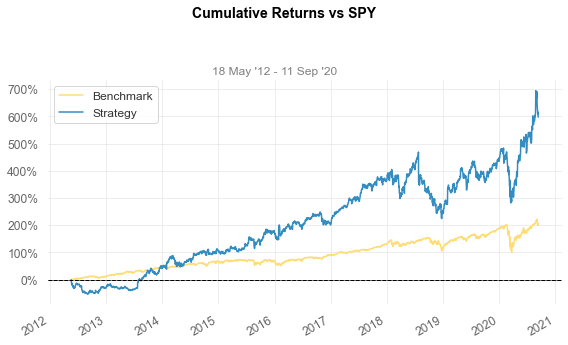

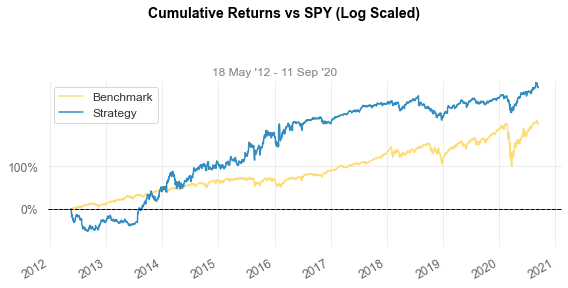

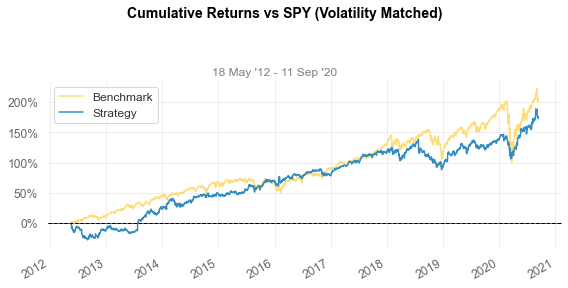

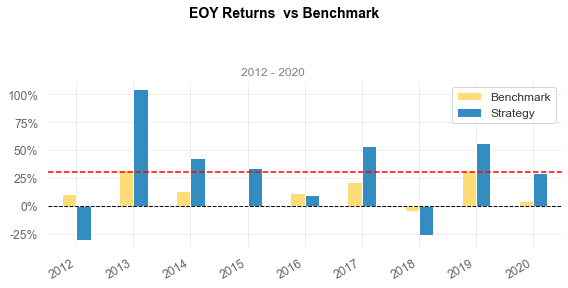

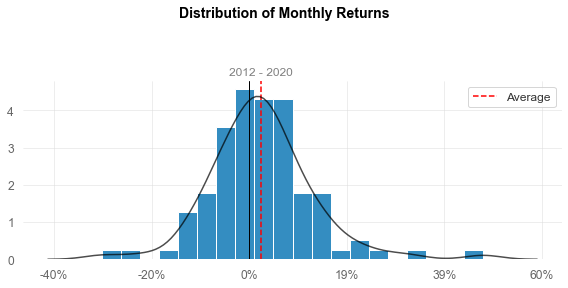

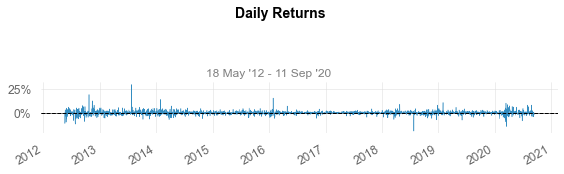

C:\Users\floda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\floda\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


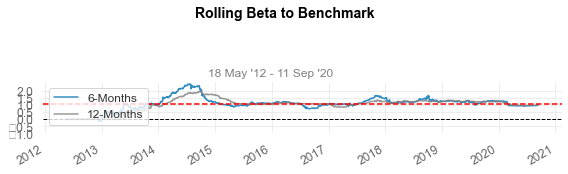

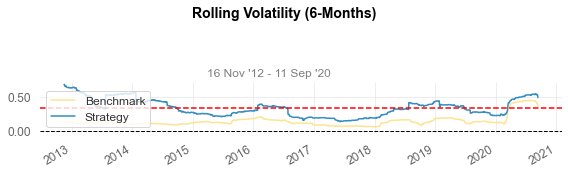

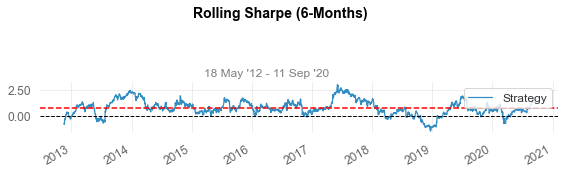

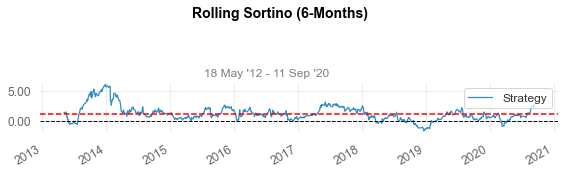

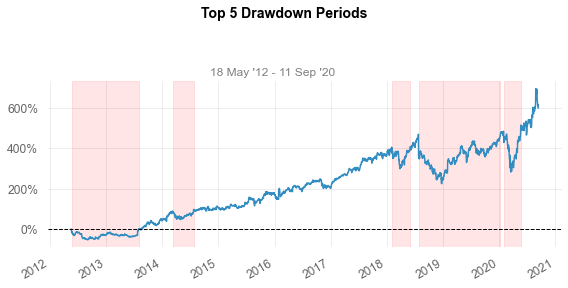

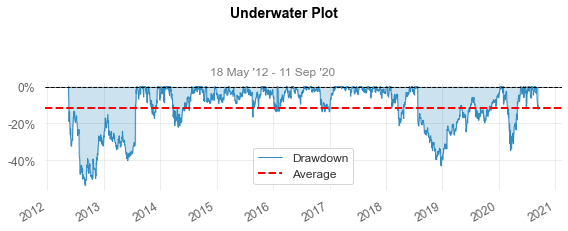

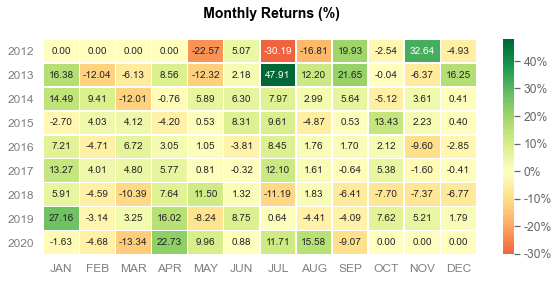

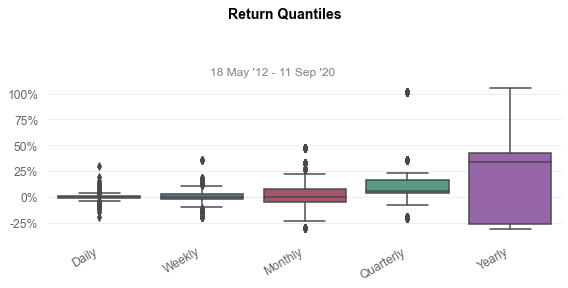

In [9]:
qs.reports.full(stock, "SPY")